In [7]:
%matplotlib inline
import numpy
import math
import csv
import matplotlib.pyplot as plt

first_collision = None

In [8]:

class Vehicle:
    def __init__(self, name):
        self.name = name
        self.x = None
        self.prev_pos = []
        self.timestamp = ""
        self.collisions = []

    def set_pos(self, speed, timestamp):
        # voor elke timestamp voegt hij de snelheid toe aan zijn positie. De eerste snelheid is zijn begin positie
        if self.x != None:
            self.prev_pos.append([self.x, self.timestamp])
        if self.x is None:
            self.x = speed
        else:
            self.x += speed
        self.timestamp = timestamp

    def check_collision(self, vehicle):
        # om te checken of de autos elkaar geraakt hebben kijkt hij eerst of de auto eerst achter hem was -1 meter zoja
        # dan kijkt hij of de auto nu voor hem is -1 meter zoja dan heeft hij hem dus door hem gereden wat niet kan dus
        # ook wel gezegd hij heeft de auto voor hem geraakt.

        # -1 meter voor voor en achter kant omdat de auto een lengte van 2 meter heeft
        global first_collision
        if len(vehicle.prev_pos) > 0:
            if vehicle.prev_pos[-1][0] <= self.x - 1 and vehicle.x >= self.x - 1:
                self.collisions.append([self.timestamp, vehicle])
                if first_collision is None:
                    first_collision = [self.timestamp, vehicle, self]

    def split_array(self):
        # deze functie zorgt ervoor dat de timestamp van de snelheid gesplitst word naar een andere array
        speeds = []
        timestamps = []
        for speed in self.prev_pos:
            speeds.append(speed[0])
            timestamps.append(speed[1])
        return timestamps, speeds

    def plot_speeds(self):
        # laat de data zien in een lijn grafiek
        plt.plot(*self.split_array())

First collision on timestamp: 0 with cars 1 and 3


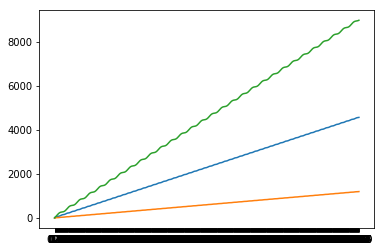

In [9]:
vehicles = []
for i in range(1, 4):
    vehicles.append(Vehicle(str(i)))
# Open het csv bestand en maak een csv reader
with open("speeds.csv", "r") as csvfile:
    speedreader = csv.reader(csvfile, delimiter=";")
    # loop door elke rij van het csv bestand heen
    for row in speedreader:
        # convert alles naar floats zodat ik hier calculaties op kan maken
        row[0] = row[0]
        row[1] = float(row[1])
        row[2] = float(row[2])
        row[3] = float(row[3])
        # bereken de posities
        for i in range(1, 4):
            vehicle = vehicles[i - 1]
            vehicle.set_pos(row[i], row[0])
            for v in vehicles:
                if v.name == vehicle.name:
                    continue
                vehicle.check_collision(v)
print(
    "First collision on timestamp: "
    + str(first_collision[0])
    + " with cars "
    + first_collision[1].name
    + " and "
    + first_collision[2].name
)
for v in vehicles:
    v.plot_speeds()

In [10]:
plt.show()